In [1]:
# !mkdir -p data/
# !curl \
#     https://zenodo.org/record/4650317/files/trajectories_stokes_subset_10000.csv.gz \
#     -o data/trajectories_stokes_subset_10000.csv.gz

In [2]:
import pandas as pd
import numpy as np

In [3]:
def load_and_subset_trajectories(file_name, num_traj=200):

    df = pd.read_csv(file_name)

    # the whole dataset is too big to open here.
    # Let's subset to 200 random trajectories:
    random_trajs = set(np.random.choice(np.unique(df["traj"]), 200, replace=False))
    traj_mask = df["traj"].apply(lambda x: x in random_trajs)
    df = df[traj_mask]
    
    return df

In [4]:
df_stokes = load_and_subset_trajectories("data/trajectories_stokes_subset_10000.csv.gz")
df_stokes

,obs,traj,MPA,distance,land,lat,lon,temp,time,z
3,0,3,1.0,0.000000,0.000000,43.280422,5.100956,13.317587,2017-03-14,1.018237
135,0,135,1.0,0.000000,0.000000,43.283524,5.262514,17.873110,2017-07-29,1.018237
148,0,148,1.0,0.000000,0.000000,43.282562,5.055849,14.794154,2017-04-26,1.018237
151,0,151,1.0,0.000000,0.000000,43.295130,5.152343,15.099274,2017-05-10,1.018237
175,0,175,1.0,0.000000,0.000000,43.300636,5.199404,14.042963,2017-03-26,1.018237
...,...,...,...,...,...,...,...,...,...,...
9639976,961,9795,10.0,255.180940,0.990113,36.853756,-2.477561,0.271453,2017-08-06,1.018237
9639993,961,9812,10.0,662.332460,0.884270,35.108990,-2.359549,1.982693,2017-04-12,1.018237
9640004,961,9823,0.0,264.948100,0.000000,35.358624,-2.376341,17.635956,2017-05-06,1.018237
9640053,961,9872,9.0,24.404638,0.999909,36.815342,-2.083329,0.002366,2017-08-21,1.018237


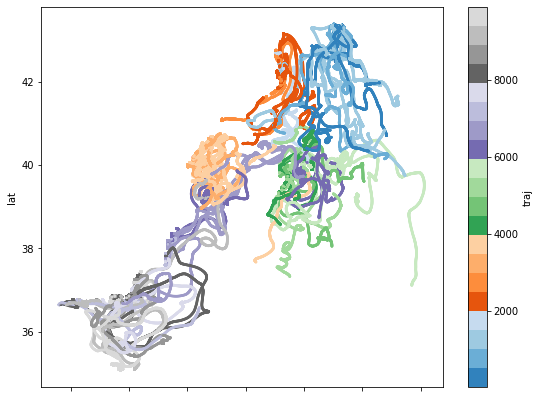

In [5]:
df_stokes.plot.scatter(
    x="lon", y="lat", s=3,
    c="traj", cmap="tab20c",
    figsize=(9, 7)
);